# **Tugas Praktikum**

### **Tugas**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

## **Model K-Means**

### **Import Library dan Persiapan data**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load data
df = pd.read_csv('data/Mall_Customers.csv')

# Tampilkan 5 baris pertama data
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Tampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### **Menetukan Fitur untuk Clustering**

In [4]:
# Memilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

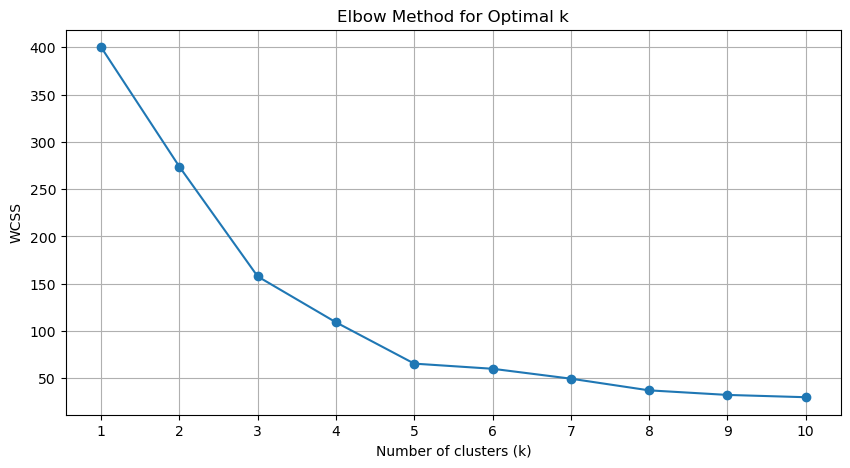

In [5]:
# Metode Elbow untuk menentukan nilai k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


### **Membuat Model K-Means**

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


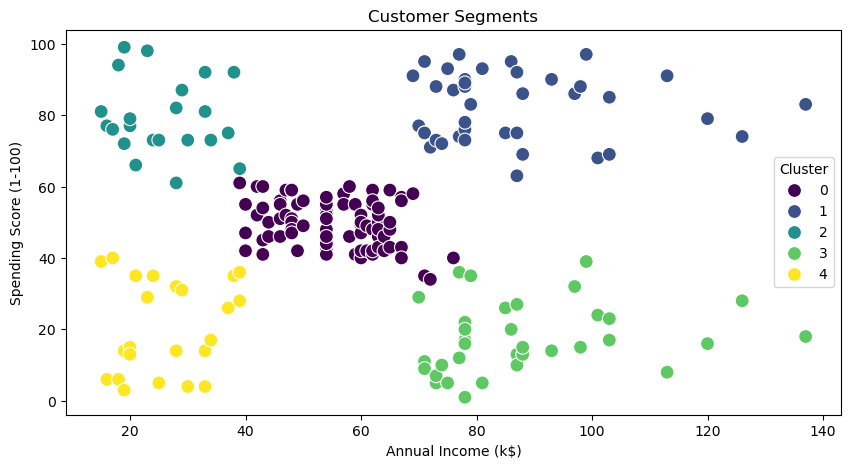

In [6]:
# Inisialisasi dan fit K-Means
k = 5  # Ganti dengan nilai k yang sesuai dari grafik Elbow
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil cluster ke DataFrame asli
df['Cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


## **Implementasi Model SOM untuk Segmentasi Citra**

### **Import Library dan Persiapan Data Citra**

In [7]:
# Import Library untuk SOM
from minisom import MiniSom
import cv2

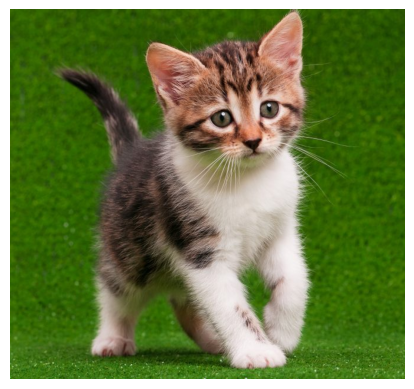

In [10]:
# Load citra
image = cv2.imread('data/Kitten.jpg')  # Ganti dengan path ke citra yang ingin di-segment
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

# Reshape citra menjadi 2D array
image_reshaped = image.reshape((-1, 3))

### **Membuat dan Melatih Model SOM**

In [11]:
# Inisialisasi SOM
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(image_reshaped)

# Melatih SOM
som.train_random(data=image_reshaped, num_iteration=100)

# Dapatkan hasil cluster
win_map = som.win_map(image_reshaped)


### **Visualisasi Hasil Segmentasi**

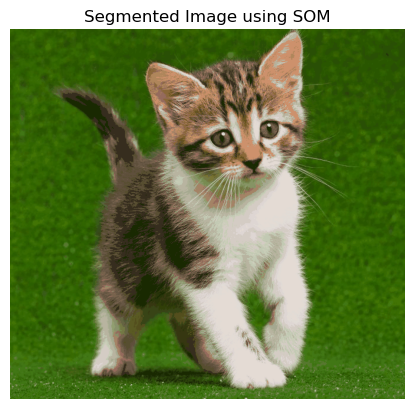

In [12]:
# Membuat citra segmentasi
segmented_image = np.zeros(image_reshaped.shape)

for i in range(len(image_reshaped)):
    w = som.winner(image_reshaped[i])
    segmented_image[i] = som.get_weights()[w]

# Reshape kembali menjadi citra
segmented_image = segmented_image.reshape(image.shape)

# Tampilkan citra segmentasi
plt.imshow(segmented_image.astype(int))
plt.axis('off')
plt.title('Segmented Image using SOM')
plt.show()
